<a href="https://colab.research.google.com/github/CodeName-Cho/Assignment/blob/main/YB_11_15_%EC%84%B8%EC%85%98_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%9A%8C%EA%B7%802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [3]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/ESAA/data/abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [6]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import warnings

In [23]:
# train과 test set 분리 (train:test = 7:3 비율로)
# 데이터를 7:3 비율로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [8]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [24]:
#릿지모델 생성 및 훈련
ridge_model = Ridge(alpha=0.3)
ridge_model.fit(X_train, y_train)

#예측값 구하기
y_pred_ridge = ridge_model.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_age_ridge = y_pred_ridge + 1.5

#MSE와 RMSE구하기
ridge_mse = mean_squared_error(y_test + 1.5, y_age_ridge)
ridge_rmse = np.sqrt(ridge_mse)

print(ridge_mse,ridge_rmse)

4.772148639987029 2.184524808736909


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [10]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [25]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
  ridge = Ridge(alpha = alpha)

  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
neg_mse = cross_val_score(ridge, X_train,y_train,scoring = 'neg_mean_squared_error', cv = 5)
ridge_rmse = np.sqrt(-1*neg_mse)
average_ridge_rmse = np.mean(ridge_rmse)
print('alpha: {0}, RMSE: {1}'.format(alpha,average_ridge_rmse))

alpha: 100, RMSE: 2.6363797551475887


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [26]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [27]:
#모델 생성 및 훈련
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

#예측값 구하기
y_pred_xgb = xgb_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_age_xgb = y_pred_xgb + 1.5
print(y_age_xgb)

#MSE와 RMSE 구하기
xgb_mse = mean_squared_error(y_test,y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)
print(xgb_mse,xgb_rmse)

[13.165637 11.196066 17.526377 ... 11.531196 13.703348 11.882135]
5.50596896102908 2.3464801215925695


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

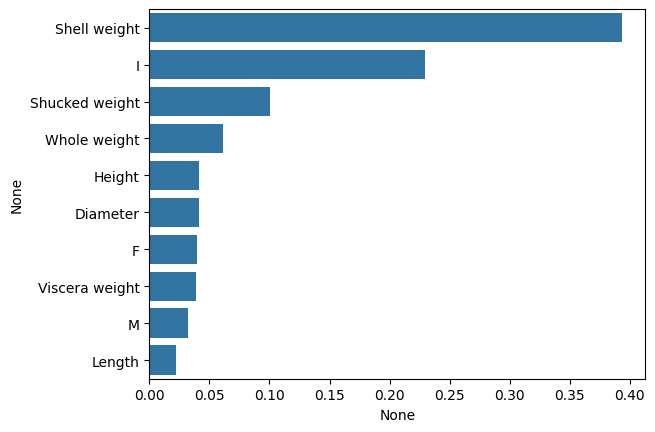

In [28]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

feature_series = pd.Series(data = xgb_reg.feature_importances_, index = data.columns )
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x= feature_series, y=feature_series.index)
plt.show()

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [15]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [16]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [17]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape
y_train.shape

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [30]:
lr_model = LogisticRegression(solver = 'liblinear') # 다중 분류에 적합한 알고리즘
lr_model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [31]:
#기울기
lr_model.coef_

array([[-1.54965916e+00, -1.18681088e+00, -4.09077816e-01,
        -1.58824084e+00, -6.78872152e-01, -3.48254703e-01,
        -4.74720086e-01, -1.05590376e+00, -8.10227765e-01,
        -1.22824772e+00],
       [-1.48746055e+00, -1.15179550e+00, -3.97464064e-01,
        -1.59363792e+00, -6.83288062e-01, -3.48783384e-01,
        -4.76644193e-01, -1.06287215e+00, -8.18767901e-01,
        -1.23421273e+00],
       [-2.28461496e+00, -1.77754583e+00, -6.02212964e-01,
        -2.71577892e+00, -1.16134726e+00, -5.94149532e-01,
        -8.27184698e-01, -3.31909754e-01, -8.21342193e-01,
        -4.84860958e-01],
       [-2.99555937e+00, -2.43109061e+00, -8.08963385e-01,
        -3.88659864e+00, -1.70339435e+00, -8.62575218e-01,
        -1.21891021e+00, -5.73142824e-02, -7.75426995e-01,
         3.22368665e-01],
       [-1.77095863e+00, -1.47968715e+00, -4.95538768e-01,
        -3.86861040e+00, -1.63270582e+00, -8.01154611e-01,
        -1.32699109e+00, -4.84133397e-01, -4.69421724e-01,
         4.

In [32]:
#절편
lr_model.intercept_

array([-3.09437925, -3.11585278, -1.63811291, -0.51037261, -0.51023998,
       -0.60766782, -1.19459202, -2.09455518, -2.45390317, -2.46163573,
       -2.93042404, -2.70381697, -2.60982717, -2.91625215, -2.97399395,
       -3.123413  , -3.24304797, -3.55149349, -3.33572154, -3.52652472,
       -3.55129211, -3.44880827, -3.15879843, -3.59847724, -3.38166607,
       -3.3558913 , -3.5307516 , -3.46994304])

3-3) 모델의 정확도를 구하세요.

In [33]:
#모델의 예측값 구하기
y_pred_Ir = lr_model.predict(X_test)

#모델의 정확도 구하기
accuracy = metrics.accuracy_score(y_test,y_pred_Ir)
print(accuracy)

0.2567783094098884
